el eda lo hicimos de archivo original 

In [ ]:
#las librerias quee importarmos para utilizar
import pandas as pd
import json
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter



In [ ]:
#abro y leo el dataset
file_path_archivo2="C:\\Users\\yanin\\Downloads\\movies_dataset.csv"  
df = pd.read_csv(file_path_archivo2)

C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\2281850169.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_archivo2)


ete archivo tiene 24 columna, con diferentes tipo de datos

In [ ]:
#info sobre df. cantidad de columnas , nulos etc
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#estadistica descriptivas
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
# Convertir columnas
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['video'] = df['video'].astype(bool)
df['adult'] = df['adult'].astype(bool)

In [ ]:
# Eliminar columnas  nulos
df.drop(columns=['belongs_to_collection', 'homepage', 'tagline'], inplace=True)

In [ ]:
# Rellenar valores nulos
df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['revenue'].fillna(df['revenue'].median(), inplace=True)
df['vote_average'].fillna(df['vote_average'].median(), inplace=True)
df['genres'].fillna('Unknown', inplace=True)
df['production_companies'].fillna('Unknown', inplace=True)
df['production_countries'].fillna('Unknown', inplace=True)

C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\1821521498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)
C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\1821521498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Filtrar valores extremos para una mejor visualización
df_filtered = df[(df['revenue'] > 0) & (df['budget'] > 0)]

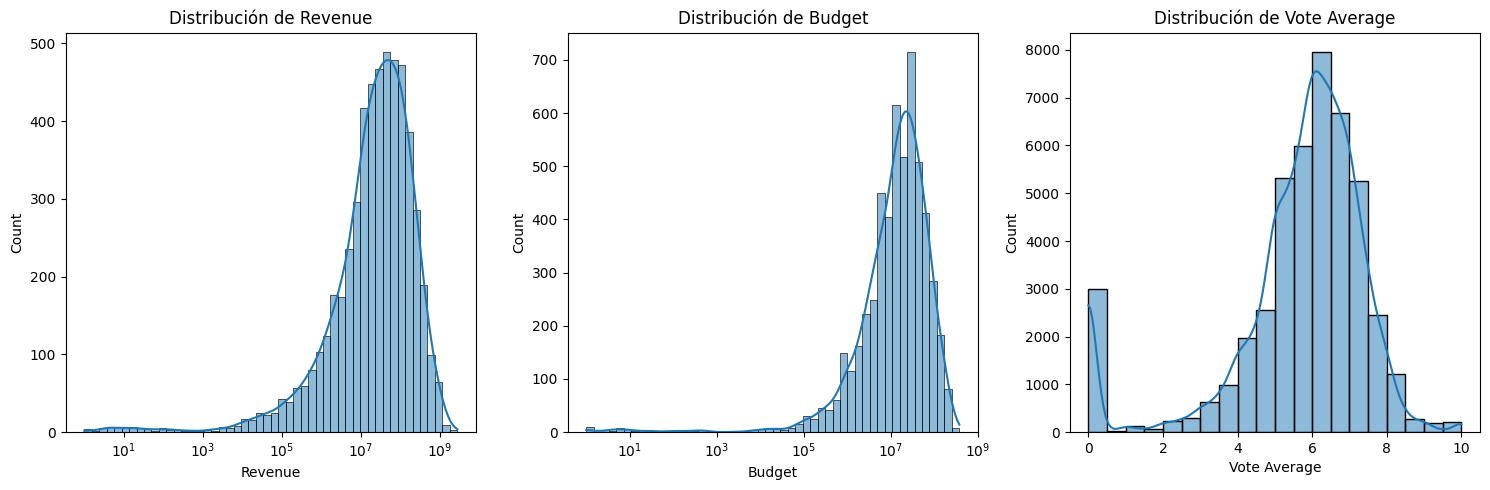

In [ ]:
# Configuración de gráficos
plt.figure(figsize=(15, 5))

# Histogramas
plt.subplot(1, 3, 1)
sns.histplot(df_filtered['revenue'], bins=50, kde=True, log_scale=True)
plt.title('Distribución de Revenue')
plt.xlabel('Revenue')

plt.subplot(1, 3, 2)
sns.histplot(df_filtered['budget'], bins=50, kde=True, log_scale=True)
plt.title('Distribución de Budget')
plt.xlabel('Budget')

plt.subplot(1, 3, 3)
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribución de Vote Average')
plt.xlabel('Vote Average')

plt.tight_layout()
plt.show()

C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\191934331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['popularity'].fillna(0, inplace=True)
c:\Users\yanin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\191934331.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

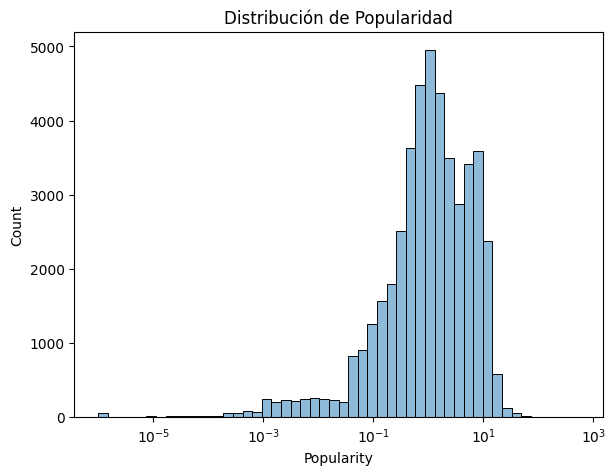

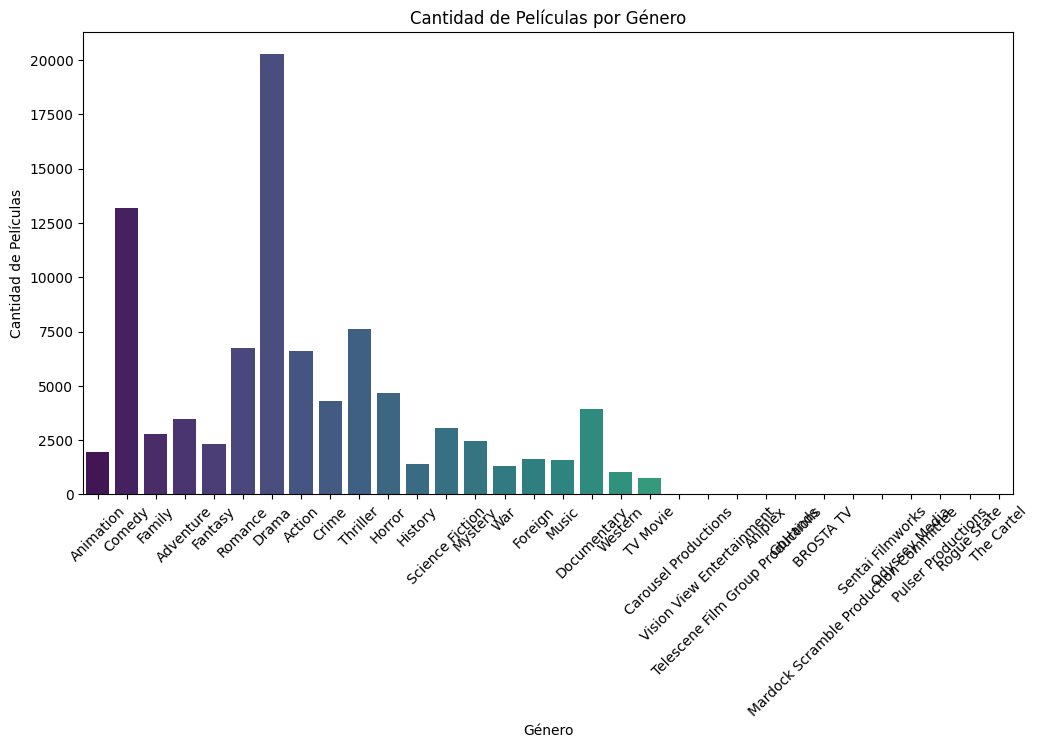

In [ ]:
# Filtrar valores de popularidad para una mejor visualización
df['popularity'].fillna(0, inplace=True)

# Contar la cantidad de películas por género (algunos tienen múltiples géneros en formato string)
from collections import Counter
import ast

# Convertir la columna de géneros a listas
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # Convertir string a lista de diccionarios
        return [g['name'] for g in genres]
    except:
        return []

df['genres_list'] = df['genres'].apply(extract_genres)
all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Configuración de gráficos
plt.figure(figsize=(15, 5))

# Histograma de Popularidad
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=50, kde=True, log_scale=True)
plt.title('Distribución de Popularidad')
plt.xlabel('Popularity')



# Gráfico de barras de los géneros más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.title("Cantidad de Películas por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")

plt.show()


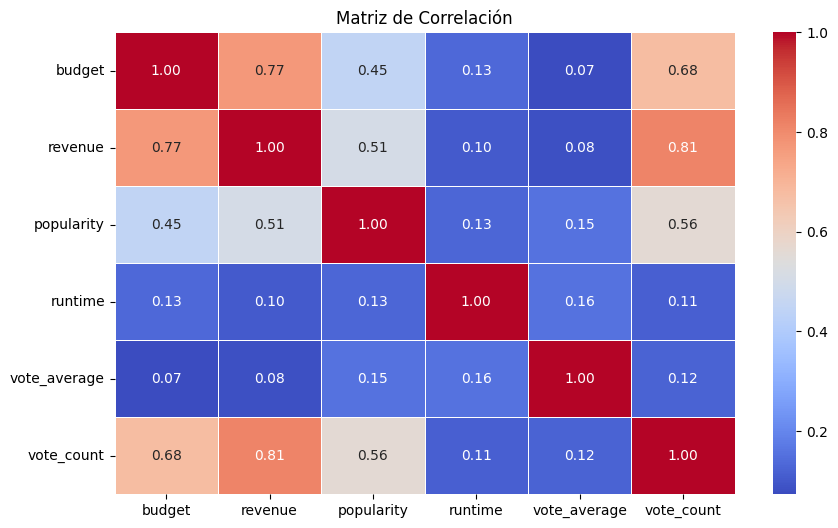

In [ ]:
#matriz correlacion
corr_matrix = df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\897859200.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="coolwarm")


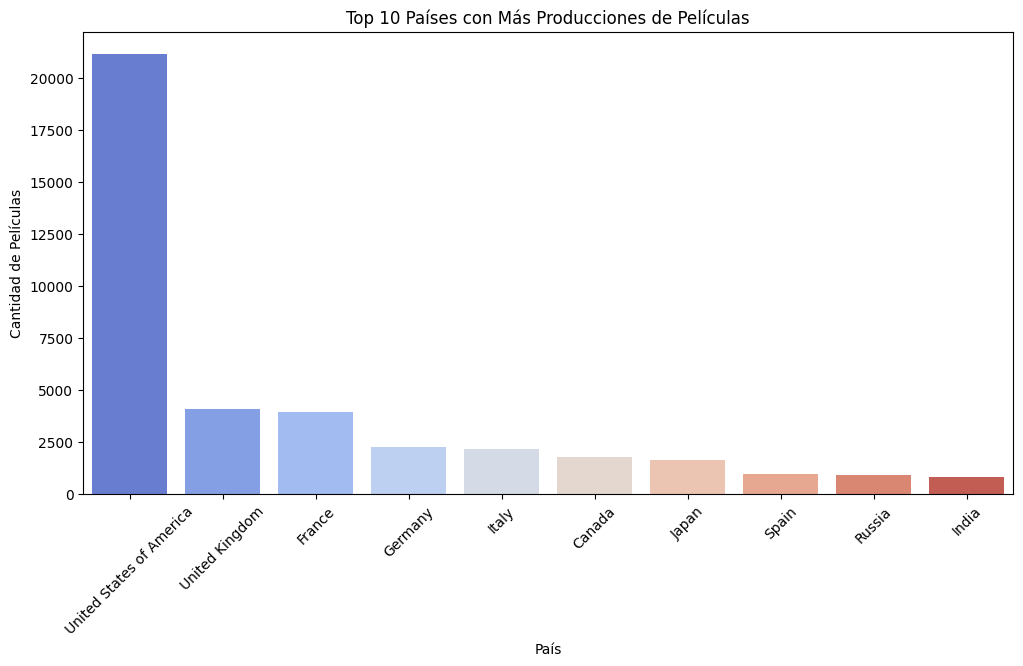

In [ ]:
# Convertir la columna 'production_countries' a listas
def extract_countries(country_str):
    try:
        countries = ast.literal_eval(country_str)
        return [c['name'] for c in countries]
    except:
        return []

df['countries_list'] = df['production_countries'].apply(extract_countries)

# Contar los países más frecuentes
all_countries = [country for sublist in df['countries_list'] for country in sublist]
country_counts = Counter(all_countries)

# Gráfico de los 10 países con más producciones
top_countries = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Países con Más Producciones de Películas")
plt.xlabel("País")
plt.ylabel("Cantidad de Películas")
plt.show()

C:\Users\yanin\AppData\Local\Temp\ipykernel_7872\1868973333.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")


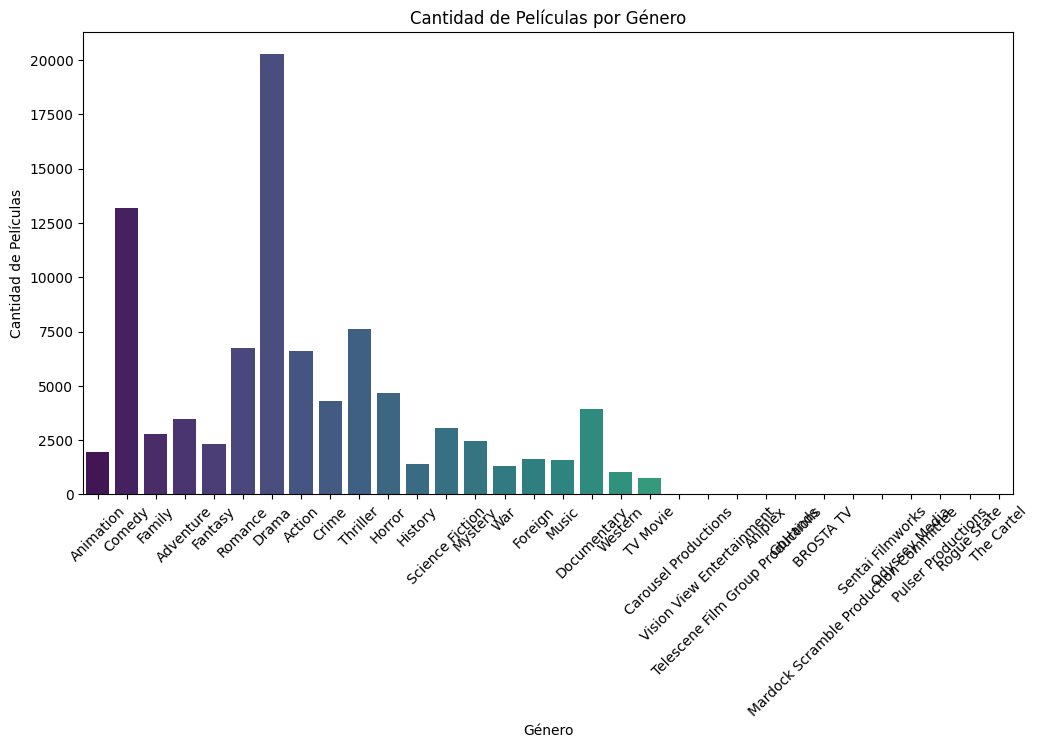

In [ ]:
# Convertir la columna 'genres' a listas de géneros
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # Convertir string a lista de diccionarios
        return [g['name'] for g in genres]
    except:
        return []

df['genres_list'] = df['genres'].apply(extract_genres)

# Contar los géneros más frecuentes
all_genres = [genre for sublist in df['genres_list'] for genre in sublist]
genre_counts = Counter(all_genres)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.title("Cantidad de Películas por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.show()

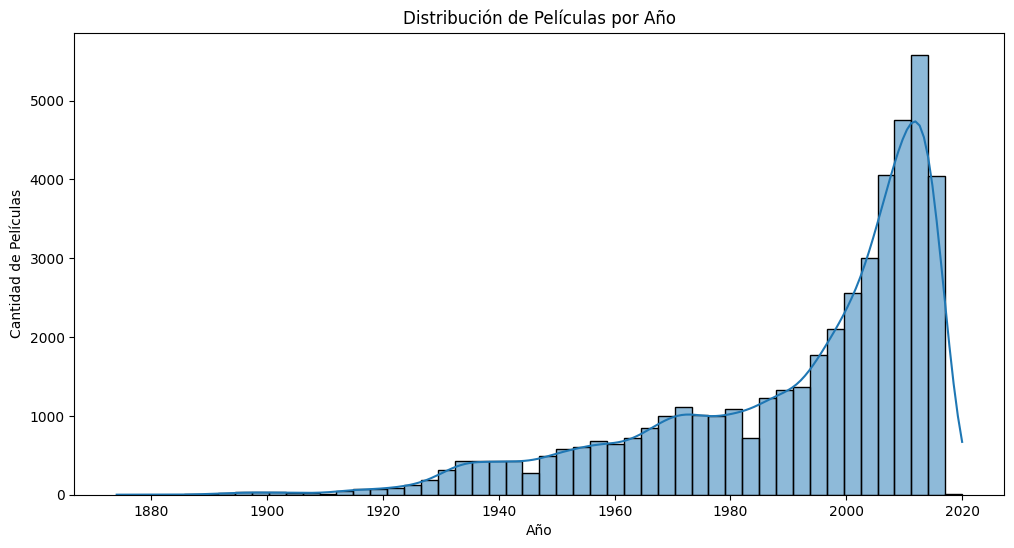

In [ ]:
# Extraer el año de la fecha de estreno
df['release_year'] = df['release_date'].dt.year

# Contar películas por año
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'].dropna(), bins=50, kde=True)
plt.title("Distribución de Películas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Películas")
plt.show()